In [2]:
import numpy as np
from PIL import Image
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from PIL import Image

In [7]:
def load_image(image_path, size=(8, 8)):
    image = Image.open(image_path).convert('L')  
    image = image.resize(size)  # Resize image
    image_np = np.array(image, dtype='float32') / 255.0  
    return image_np

image_path = r'D:\6m_NIC\images\building.jpeg'
image = load_image(image_path)

flattened_image = image.flatten()

theta = 2 * np.arccos(np.sqrt(flattened_image))

In [11]:
size = image.shape[0]  
n = int(np.log2(flattened_image.size))  

qr = QuantumRegister(n + 1)  
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)


In [12]:
for i in range(n):
    qc.h(qr[i])

for i in range(flattened_image.size):
    binary_string = format(i, '0' + str(n) + 'b')
    for idx, bit in enumerate(binary_string):
        if bit == '0':
            qc.x(qr[idx])

    qc.mcry(theta[i], qr[:n], qr[n])  # Multi-controlled Y rotation

    for idx, bit in enumerate(binary_string):
        if bit == '0':
            qc.x(qr[idx])


      ┌───┐┌───┐                                           ┌───┐   ┌───┐ »
q3_0: ┤ H ├┤ X ├──■─────────────────────────────────■──────┤ X ├───┤ X ├─»
      ├───┤├───┤  │                                 │      ├───┤   ├───┤ »
q3_1: ┤ H ├┤ X ├──■─────────────────────────────────■──────┤ X ├───┤ X ├─»
      ├───┤├───┤  │              ┌────┐             │      └───┘   ├───┴┐»
q3_2: ┤ H ├┤ X ├──■──────────────┤1   ├─────────────■──────────────┤1   ├»
      ├───┤├───┤┌─┴──┐           │    │           ┌─┴──┐           │    │»
q3_3: ┤ H ├┤ X ├┤1   ├───────────■    ├───────────┤1   ├───────────■    ├»
      ├───┤├───┤│    │           │    │           │    │           │    │»
q3_4: ┤ H ├┤ X ├┤    ├───────────■  X ├───────────┤    ├───────────■  X ├»
      ├───┤├───┤│  X │           │    │           │  X │           │    │»
q3_5: ┤ H ├┤ X ├┤    ├───────────■    ├───────────┤    ├───────────■    ├»
      └───┘└───┘│    │┌─────────┐│    │┌─────────┐│    │┌─────────┐│    │»
q3_6: ──────────┤0   ├┤ U

C:\Users\DELL\AppData\Local\Temp\ipykernel_16488\222148320.py:9: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc_compiled)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16488\222148320.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


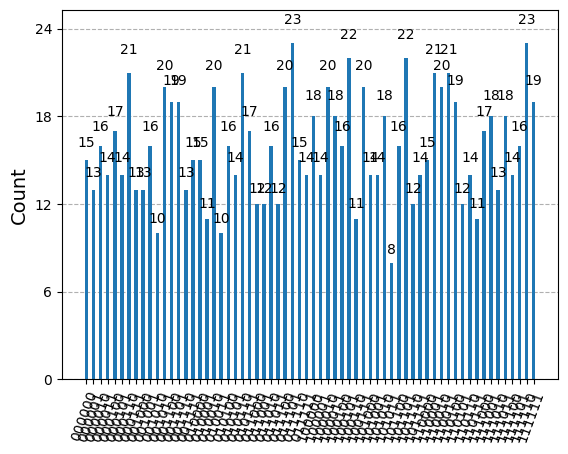

In [13]:
qc.measure(qr[:-1], cr)  # Measure only the position qubits, not the intensity qubit

print(qc)

simulator = Aer.get_backend('qasm_simulator')

qc_compiled = transpile(qc, simulator)

qobj = assemble(qc_compiled)

result = simulator.run(qobj).result()

counts = result.get_counts()

plot_histogram(counts)
